# **Исследование рынка видеоигр**

**Цель исследования**

Выявить определяющие успешность игры закономерности на основе данных из открытых источников. На основании выявленных закономерностей определить потенциально популярный продукт и спланировать рекламные кампании.

**Ход исследования**
1. Загрузка файла с данными, изучение общей информации
2. Изучить информацию о файле, выявить пропуски в данных, устранить дубликаты и аномалии.
3. Провести исследовательский анализ данных:
 - сколько игр выпускалось в разные годы. 
 - как менялись продажи по платформам. 
 - какие платформы лидируют по продажам, растут или падают.
 - построить график «ящик с усами» по глобальным продажам игр в разбивке по платформам. 
 - посмотреть, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.
 - соотнести выводы с продажами игр на других платформах.
 - рассмотреть общее распределение игр по жанрам. 
4. Составьте портрет пользователя каждого региона:
 - определить для пользователя каждого региона (NA, EU, JP):
 - самые популярные платформы (топ-5).
 - самые популярные жанры (топ-5).
 - влияет ли рейтинг ESRB на продажи в отдельном регионе?
5. Проверить гипотезы:
 - средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
 - средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
6. Вывод.

## **1. Загрузка файла с данными, изучение общей информации**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
from scipy import stats as st


In [2]:
try:
    data = pd.read_csv('C:/Users/user/Desktop/123/Игры/games.csv')
except:
    data = pd.read_csv('/datasets/games.csv')

data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Файл содержит 16715 строк и 11 столбцов. В файле собраны данные о компьютерных играх, их названия, жанры, рейтинги, оценки, информация о кодичестве проданных копий. В данных есть пропуски. Их особенно много в столбце "оценка критиков" и "рейтинг от организации ESRB".
Информация представлена 2 типов: float64, object. Скорее всего колонку "Year_of_Release" необходимо будет привести к виду datetime, а также привести названия столбцов к нижнему регистру.

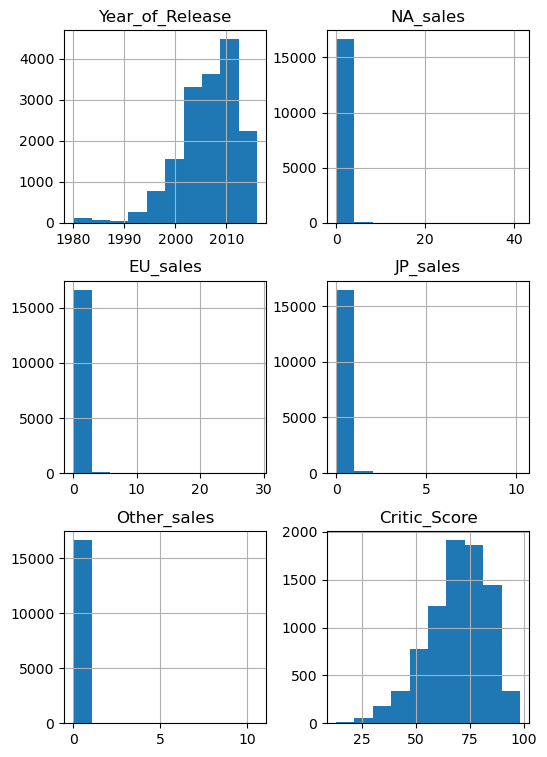

In [4]:
data.hist(figsize=(6, 9))
plt.show()

На основании данных таблицы можно построить 6 гистограмм. 
- согласно гистограммы столбца "Year_of_Release" можно сделать вывод, что количество выпускаемых компьютерных игр неуклонно растет, особенно быстрый рост заметен с 2002 года. спад в конце анализируемого периода, возможно связан с недостатком обработанной информации (данные за неполный год).
- "NA_sales", "EU_sales", "JP_sales". Об объемох продаж достаточно сложно судить по получившимся гистограмам. Скорее всего, есть единичные выбросы, которые искажают общую картину. Можно говорить о том, что большинство игр продавались типажом до 1-2 млн.копий.
- "Critic_Score" - большое число игр имеет оценку критиков в 55 аллов и выше.

## **2. Подготовка данных**
### **2 .1 Названия столбцов**
Заменим названия столбцов, приведем их к нижнему регистру, для удобства дальнейшей работы.

In [5]:
data.columns = data.columns.str.lower()
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


### **2.2 Обработка пропусков**

In [6]:
#поиск пропусков
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [7]:
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
name,0.000000
platform,0.000000
year_of_release,2.000000
genre,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,51.000000
user_score,40.000000


Больше всего пропущенных значений в столбцах "critic_score", "user_score", "rating", т.е. в столбцах, отвечающих за оценку/рейтинг игр.

In [8]:
data[data['name'].isna() == True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


В столбце "name" лишь 2 пропуска в названии игр, а также не заполнено большинство других данных. Эти 2 строки можно удалить. Они практически не несут смысловой информации.

В столбце "year_of_release" 269 пропусков. Это 1,6% от общего числа строк. Год выпуска имеет решающее значение в последующем анализе. Заменить пропуски не представляется возможным без искажения всей структуры данных, поэтому считаю, что эти строки можно удалить.

In [9]:
data = data[data['name'].isna() == False]
data = data[data['year_of_release'].isna() == False]
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [10]:
data[data['user_score']=='tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
718,Just Dance Kids,Wii,2010.0,Misc,1.52,0.54,0.0,0.18,NaN,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


В столбце "user_score" встречается значение рейтинга "tbd". 

TBD - аббревиатура от английского To Be Determined (будет определено) или To Be Decided (будет решено). Используется, если какая-то информация еще не определена или решение по вопросу не принято. Служит для отметки неясностей или пропусков, которые надо заполнить, в информации требований. Т.е. данных недостаточно для присвоения рейтинга, скорее всего пользовательских оценок недостаточно для присвоения игре рейтинговых баллов. Заменим эту аббревиатуру на "NaN".

In [11]:
data['user_score'] = data['user_score'].replace('tbd', np.nan)
# проверим количество пропусков
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6676
dtype: int64

In [12]:
# проверим на наличие дубликатов
print(data.duplicated().sum())

0


Явных дубликатов в таблице нет. Есть лишь игры (одного наименования), выпущенные для разных платформ. 


В итоге, мы избавились от пропущенных значений в столбцах "name" и "year_of_release". Заменить какими-либо значениями эти пропуски не представлялось возможным. Скорее всего пропуски в этих колонках появились в результате технических ошибок (игры без названий), либо при заполнении информации пользователями(отсутствие года выпуска), заполняющий, возможно, спешил либо не посчитал нужным указать этот параетр в отдельном поле.

В столбце "user_score" избавились от аббревиатуры "tbd".

В столбцах "critic_score", "user_score", "rating" осталось значительное количество пропусков. Считаю, что их некорректно будет заполнять "0" (нулем), средним или медианой, т.к. интерес к определенной игре - специфическая величина, на которую влияют многие факторы, не отраженные в таблице. Пока отавим эти данные без изменений.

### **2.3 Типы данных**
Приведем столбец "year_of_release" к типу int, а столбец "user_score" к float64. 

Можно преобразовать столбец "year_of_release" к формату datetime, но в столбце содержатся данные только о годе выпуска игры, без указания числа и месяца. При преобразовании к datetime получим формат вида "2006-01-01", что не упростит работу, считаю, что формат int будет удобнее в дальнейшем исследовании.


In [13]:
#data['year_of_release'] = pd.to_datetime(data['year_of_release'], format='%Y')
data['year_of_release'] = data['year_of_release'].astype('int')
data['user_score'] = pd.to_numeric(data['user_score'])

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.4+ MB


### **2.4 Столбец суммарные продажи**
Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец

In [14]:
#data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data.insert(8, 'total_sales', data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales'])
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,82.54,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,35.52,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,32.77,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,31.38,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN


## **3. Исследовательский анализ данных**

### **3.1 Количество выпущенных игр в разные годы**
Рассмотрим, сколько игр выпускалось в разные годы. 

In [15]:
data_year_of_release = data.groupby('year_of_release')['name'].agg('count')
data_year_of_release

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64

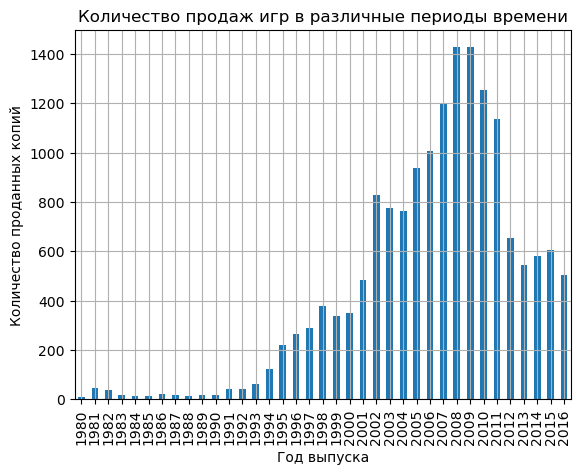

In [17]:
data_year_of_release.plot(kind='bar', grid = True, title = 'Количество продаж игр в различные периоды времени', 
                          xlabel='Год выпуска', ylabel='Количество проданных копий')

plt.show()

До 1993 года выпуск компьютерных игр был незначительным. С развитием компьютерных технологий, с 1994 года на графике виден активный рост продаж игр. Бурный рост продаж произошел с 2002 года и достиг своего пика в 2007-2008 годах. Это можно связать с доступностью персональных компьютеров и игровых консолей для пользователей. В 2012 году произошел резкий спад производства. Возможно это последствия мирового финансового кризиса или последствия развития мобильных технологий и интеграция игр к мобильным платформам. Но начина с 2013 года производство компьютерных игр начало постепенно увеличиваться (не берем 2016год, т.к. данные за этот год скорее всего неполные).

Считаю, что иследование следует проводить, опираясь на данные, не ранее 2002г., т.к. в более ранные периоды бурного развития игр не наблюдалось.

### **3.2 Продажи в зависимости от платформы**
Рассмотрим, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [18]:
# Определим платформы с наибольшим объемом продаж за все время исследования.
data_platform = data.groupby('platform')['total_sales'].agg('sum').sort_values(ascending=False)
data_platform

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
PC       255.76
GB       254.43
XB       251.57
NES      251.05
N64      218.01
SNES     200.04
GC       196.73
XOne     159.32
2600      86.48
WiiU      82.19
PSV       53.81
SAT       33.59
GEN       28.35
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64

Наибольшее количество продаж за все время исследования приходилось на платформы PS2, X360, PS3, Wii, DS, PS.

In [19]:
# Определим ТОП15 платформ с объемом продаж более 218 млн.копий
top_15_platforms = data_platform.head(15)
top_15_platforms

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
PC       255.76
GB       254.43
XB       251.57
NES      251.05
N64      218.01
Name: total_sales, dtype: float64

In [20]:
# таблица для построения графика продаж по платформам
sales_per_year_by_platform = data.pivot_table(index = 'year_of_release', columns = 'platform', values = 'total_sales', aggfunc = 'sum')
plot_table = sales_per_year_by_platform[top_15_platforms.index]
plot_table

platform,PS2,X360,PS3,Wii,DS,PS,PS4,GBA,PSP,3DS,PC,GB,XB,NES,N64
year_of_release,,,,,,,,,,,,,,,
1980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1981,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1982,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1983,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.96,NaN
1984,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.08,NaN
1985,NaN,NaN,NaN,NaN,0.02,NaN,NaN,NaN,NaN,NaN,0.04,NaN,NaN,53.44,NaN
1986,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.41,NaN
1987,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.76,NaN
1988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.03,1.43,NaN,45.01,NaN


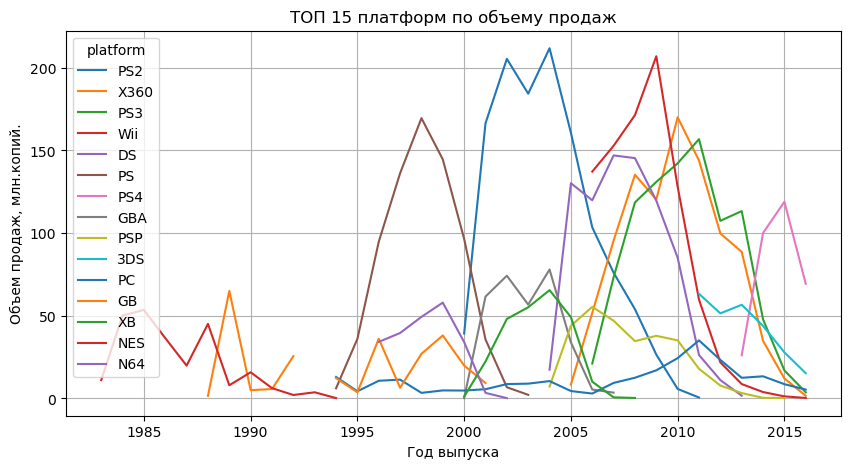

In [21]:
# график продаж по платформам
plot = plot_table.plot(figsize=(10,5), 
                       legend=True, 
                       grid=True, 
                       title='ТОП 15 платформ по объему продаж', 
                       xlabel='Год выпуска', 
                       ylabel='Объем продаж, млн.копий.')


Из приведенных выше графика и таблицы видно, что игровые платформы появляются и исчезают: резко набирают популярность(возможно за счет популярных игр), несколько лет остаются в ТОПе, а затем также резко теряют популярность и заменяются новыми, скорее всего, более современными и производительными платформами. 

Пик появления и развития игровых платформ как раз приходится на период всплеска интереса пользователей к играм, т.е. на период времени, начиная с 2005г.

Рассмотрим, сколько в среднем "живет" игровая платформа.

In [22]:
lifetime_platform = data.groupby('platform')['year_of_release'].agg(['min', 'max'])
lifetime_platform['lifetime'] = lifetime_platform['max'] - lifetime_platform['min']
print(lifetime_platform.sort_values(by='lifetime'))
print('Среднее время жизни платформы составляет ', round(lifetime_platform['lifetime'].mean(), 1), 'лет.')

           min   max  lifetime
platform                      
GG        1992  1992         0
PCFX      1996  1996         0
TG16      1995  1995         0
3DO       1994  1995         1
SCD       1993  1994         1
WS        1999  2001         2
NG        1993  1996         3
XOne      2013  2016         3
PS4       2013  2016         3
GEN       1990  1994         4
WiiU      2012  2016         4
PSV       2011  2016         5
3DS       2011  2016         5
SAT       1994  1999         5
N64       1996  2002         6
GC        2001  2007         6
GBA       2000  2007         7
XB        2000  2008         8
SNES      1990  1999         9
2600      1980  1989         9
PS        1994  2003         9
PS3       2006  2016        10
Wii       2006  2016        10
DC        1998  2008        10
PS2       2000  2011        11
NES       1983  1994        11
X360      2005  2016        11
PSP       2004  2015        11
GB        1988  2001        13
DS        1985  2013        28
PC      

Среднее время существования платформы составляет 7,6 лет. Есть платформы, которые абсолютно не прижились и просуществовали лишь год-два, такие как GG, PCFX, TG16, 3DO и др. Но есть и платформы "долгожители", такие как  NES, DS, GB, но их долгий период существования обусловлен тем, что эти платформы были выпущены в 80-х годах прошлого века и долго существовали без конкурентов.
Из платформ-долгожителей также хотелось бы выделить PS2, X360, PSP - платформы, появившиеся на рынке в период роста популярности игр и на протяжении 11 лет удовлетворявшие потребности пользователей.

### **3.3 Актуальный период**

Выберем из всех представленных для анализа данных данные на актуальный период времени. Мы будем делать прогноз на 2017 год, следовательно  к этому времени некоторые из платформ уже потеряли свою актуальность. Срок существования платформы 7-8 лет, следовательно данные за период ранее 2010 года уже не актуальны. 

При этом традиционно в бизнесе долгосрочный прогноз строится на основании данных за 3 предыдущих периода. Так как данные за 2016 год представленны не в полном объеме и нам не известно, за какой период они отсутствуют, предполагаю, что целесообразно будет взять для исследования временной промежуток 2013-2016гг. 

Рассмотрим, какие платформы лидируют по продажам, растут или падают? Выберем несколько потенциально прибыльных платформ.

In [24]:
games = data[data['year_of_release']>=2013]
games['platform'].unique()

array(['PS3', 'X360', 'PS4', '3DS', 'XOne', 'WiiU', 'Wii', 'PC', 'PSV',
       'DS', 'PSP'], dtype=object)

In [25]:
games.groupby('platform')['total_sales'].agg('sum').sort_values(ascending=False)

platform
PS4     314.14
PS3     181.43
XOne    159.32
3DS     143.25
X360    136.80
WiiU     64.63
PC       39.43
PSV      32.99
Wii      13.66
PSP       3.50
DS        1.54
Name: total_sales, dtype: float64

In [26]:
games_pivot = games.pivot_table(index = 'year_of_release', columns = 'platform', values = 'total_sales', aggfunc = 'sum')
games_pivot

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2013,56.57,1.54,12.38,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2014,43.76,NaN,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,NaN,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,NaN,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


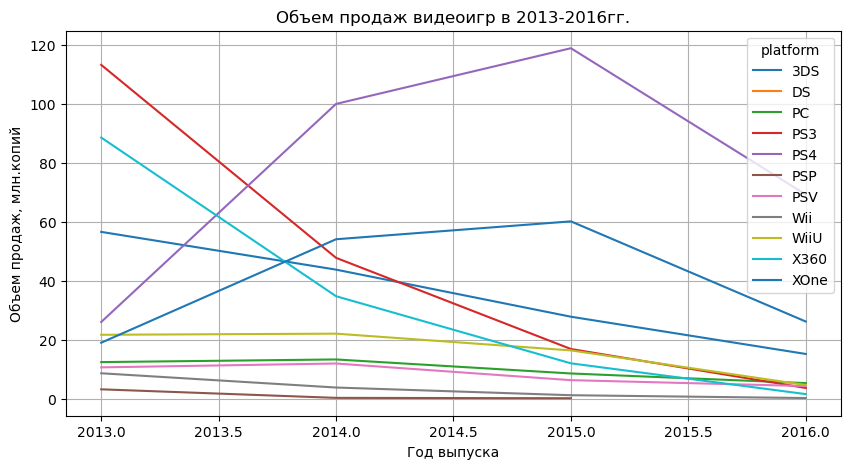

In [27]:
games_pivot.plot(figsize=(10,5), legend=True, grid=True, title='Объем продаж видеоигр в 2013-2016гг.', xlabel='Год выпуска', ylabel='Объем продаж, млн.копий')
plt.show()

Из полученных таблиц и графика видно, что DS, Wii, PSP потеряли свою актуальность. PS3 и X360 также теряют актуальность, продажи снижаются с каждым годом, и уже постепенно заменяются более новыми PS4 и XOne. 
3DS, WiiU,  пока еще актуальны у пользователей видеоигр, а также игры на PC пользуются хоть и меньшей популярностью, но продажи таких игр сохраняются на протяжении долгого времени. 
PSV конечно еще пытается "держаться на плаву", но объем продаж игр на этой платформа падает и выпущена она была 5ю годами ранее (а срок жизни платформы 7-8 лет), поэтому считаю эту платформу не актуальной для последующего анализа.
А вот продажи игр на консолях PS4, XOne набирают популярность (если не брать во внимание данные за неполный 2016г.)

Сосредоточимся на анализе 5 популярных платформ. 

In [28]:
new_games = games.query('platform in ["3DS", "PS4", "WiiU", "XOne", "PC"]')
new_games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,14.63,NaN,NaN,NaN
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,14.60,NaN,NaN,NaN
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,12.62,97.0,8.3,M
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,11.68,NaN,NaN,NaN
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,8.58,82.0,4.3,E
...,...,...,...,...,...,...,...,...,...,...,...,...
16660,Prison Architect,XOne,2016,Action,0.01,0.00,0.00,0.00,0.01,74.0,6.7,NaN
16668,Fujiko F. Fujio Characters: Great Assembly! Sl...,3DS,2014,Action,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN
16672,Metal Gear Solid V: The Definitive Experience,XOne,2016,Action,0.01,0.00,0.00,0.00,0.01,NaN,NaN,M
16677,Aikatsu Stars! My Special Appeal,3DS,2016,Action,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN


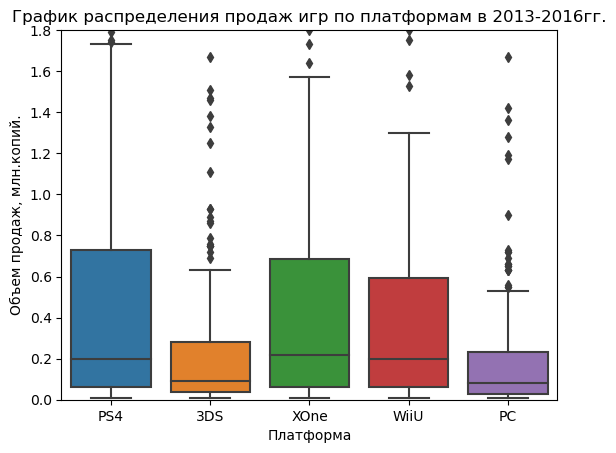

In [29]:
sns.boxplot(x='platform', y="total_sales", data=new_games)
plt.ylim(0, 1.8)
plt.ylabel('Объем продаж, млн.копий.')
plt.xlabel('Платформа')
plt.title('График распределения продаж игр по платформам в 2013-2016гг.')
plt.show()

In [30]:
new_games.pivot_table(values='total_sales', index='name', columns='platform').describe()

platform,3DS,PC,PS4,WiiU,XOne
count,303.000000,189.000000,392.000000,115.000000,247.000000
mean,0.472772,0.208624,0.801378,0.562000,0.645020
std,1.381347,0.352304,1.609456,1.038778,1.036139
min,0.010000,0.010000,0.010000,0.010000,0.010000
25%,0.040000,0.030000,0.060000,0.060000,0.060000
50%,0.090000,0.080000,0.200000,0.200000,0.220000
75%,0.280000,0.230000,0.730000,0.595000,0.685000
max,14.600000,3.050000,14.630000,7.090000,7.390000


In [31]:
new_games[new_games['total_sales']>14]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,14.63,NaN,NaN,NaN
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,14.60,NaN,NaN,NaN


In [32]:
display(new_games[new_games['name']=='Call of Duty: Black Ops 3'])
new_games[new_games['name']=='Pokemon X/Pokemon Y']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,14.63,NaN,NaN,NaN
99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,7.39,NaN,NaN,NaN
6463,Call of Duty: Black Ops 3,PC,2015,Shooter,0.00,0.25,0.00,0.01,0.26,NaN,NaN,NaN


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,14.6,NaN,NaN,NaN


На основании полученного графика (боксплота) можно сделать предположения:
- на основании межквартильного размаха можно расположить платформы в порядке убывания объемов продаж: PS4, XOne, WiiU, 3DS, PC.
- больше всего видеоигр продается на консолях PS4 и XOne.
- самые кассовые игры, которые продались тиражом более 14млн.копий были выпущены для PS4 (2015г.) и 3DS (2013г.).
- медиана свидетельствует о том, что больше половины игр для консолей PS4, WiiU, XOne продаются в объемах более 200-220 тыс.копий.


### **3.4 Влияние рейтинга на объемы продаж**

Рассмотрим, как влияют на продажи внутри одной из популярных платформ отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. 

#### **3.4.1 Оценка критиков и объем продаж игр на PS4**

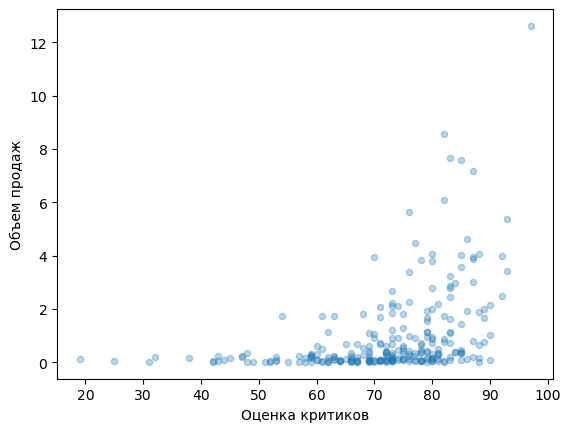

0.4065679020617814


In [34]:
new_games.query('platform=="PS4"').plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.3) 
plt.xlabel('Оценка критиков')
plt.ylabel('Объем продаж')
plt.show()
print(new_games.query('platform=="PS4"')['critic_score'].corr(new_games.query('platform=="PS4"')['total_sales']))

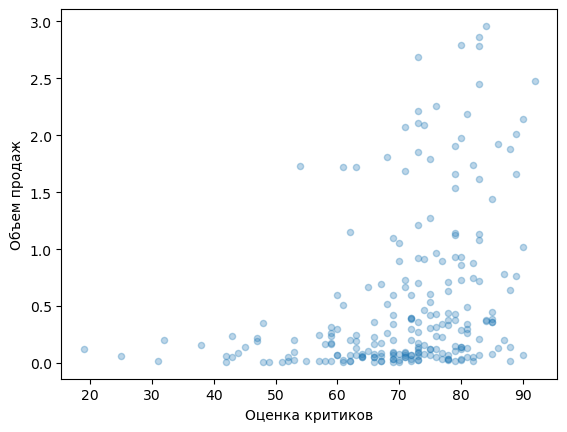

In [36]:
#возьмем срез данных, чтобы поближе посмотреть основные объемы продаж
new_games[new_games['total_sales']<3].query('platform=="PS4"').plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.3) 
plt.xlabel('Оценка критиков')
plt.ylabel('Объем продаж')
plt.show()

На диаграмме рассеивания можно увидеть, что большинство игр получает оценку критиков в промежутке 57-90 баллов. Есть отдельные игры, которые разошлись многомиллионными копиями(6-14 млн.копий), но это скорее исключение из правила. Большая часть игр продавалась объемами до 0,5 млн.копий и их оценка составляла 60-80 баллов (скопление точек на диаграмме в прямоугольнике 60-80 баллов, 0-0,5 млн.продаж).

Коэффициент корреляции Пирсона показывает, что между анализируемыми показателями существует прямая связь. При оценке силы связи коэффициентов корреляции используется шкала Чеддока. Согласно этой шкале связь между объемом продаж и оценкой критиков слабая. Т.е. с повышение оценки игры критиками объемы продаж на PS4 возрастают, но незначительно.

#### **3.4.2 Оценка пользователей и объем продаж игр на PS4**

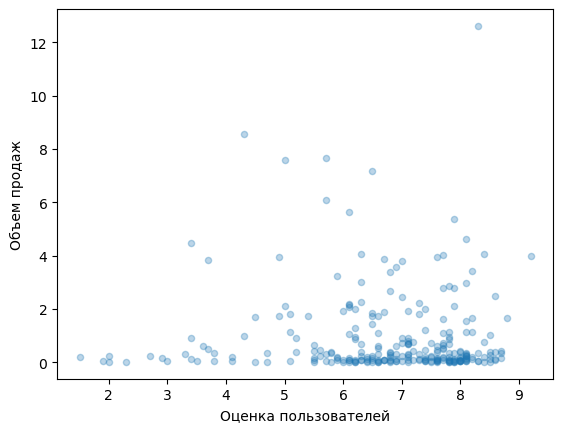

-0.03195711020455646


In [38]:
new_games.query('platform=="PS4"').plot(x='user_score', y='total_sales', kind='scatter', alpha=0.3) 
plt.xlabel('Оценка пользователей')
plt.ylabel('Объем продаж')
plt.show()
print(new_games.query('platform=="PS4"')['user_score'].corr(new_games.query('platform=="PS4"')['total_sales']))

На диаграмме рассеивания можно увидеть, что большинство игр получает оценку пользователей в промежутке 6-8,2 балла. Есть отдельные игры, которые разошлись многомиллионными копиями(6-14 млн.копий), но это скорее исключение из правила. При этом есть игра с тиражом 14млн.копий и оценкой в 8,5 балла, так и игры с тиражом более 8 млн., оцененные пользователями в 4,5 балла. Большая часть игр продавалась объемами до 0,5 млн.копий и их оценка составляла 6-8,8 баллов (скопление точек на диаграмме в прямоугольнике 6-8,8 баллов, 0-0,5 млн.продаж).

Коэффициент корреляции Пирсона подтверждает, что связь между оценкой пользователями и объемами продаж игр на платформе PS4 отсутствует. Т.е. с ростом оценки нет роста объемов продаж, скорее даже наоборот, спад.

#### **3.4.3 Оценка критиков и объем продаж игр**

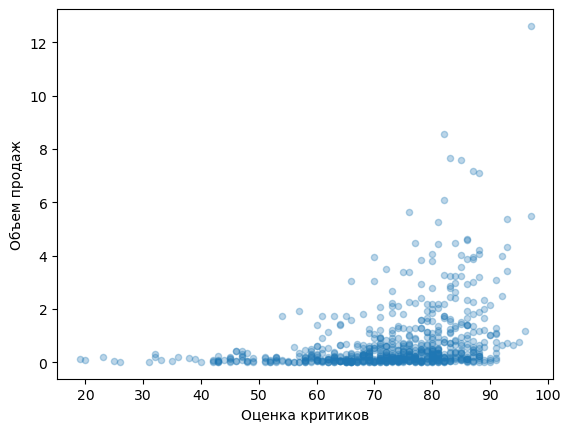

0.33357537107611446


In [40]:
new_games.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.3) 
plt.xlabel('Оценка критиков')
plt.ylabel('Объем продаж')
plt.show()
print(new_games['critic_score'].corr(new_games['total_sales']))

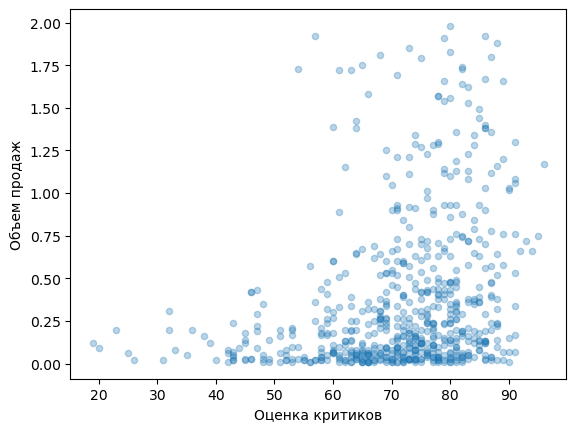

In [41]:
new_games[new_games['total_sales']<2].plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.3) 
plt.xlabel('Оценка критиков')
plt.ylabel('Объем продаж')
plt.show()

На диаграмме рассеивания можно увидеть, что большинство игр на всех игровых платформах получают оценку критиков в промежутке 50-88 баллов. Есть отдельные игры, которые разошлись многомиллионными копиями(4-14 млн.копий), но это скорее исключение из правила. Большая часть игр продавалась объемами до 0,25 млн.копий и их оценка составляла 60-83 баллов (скопление точек на диаграмме в прямоугольнике 60-83 баллов, 0-0,25 млн.продаж).

Коэффициент корреляции Пирсона показывает, что между оценкой критиков и объемами продаж существует слабая прямая связь.

Распределение оценок критиков игр у платформы PS4 и общей массы платформ схожи и составляют 60-80 баллов. Но т.к. платформа PS4 одна из самых популярных в последние годы, скорее всего для этой платформы выпускаются самые кассовые игры, которые потом расходятся большим тиражом. 

#### **3.4.4 Оценка пользователей и объем продаж игр**

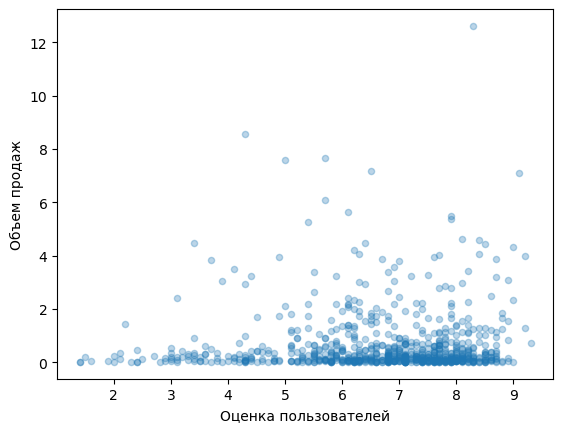

0.041998963239150935


In [42]:
new_games.plot(x='user_score', y='total_sales', kind='scatter', alpha=0.3) 
plt.xlabel('Оценка пользователей')
plt.ylabel('Объем продаж')
plt.show()
print(new_games['user_score'].corr(new_games['total_sales']))

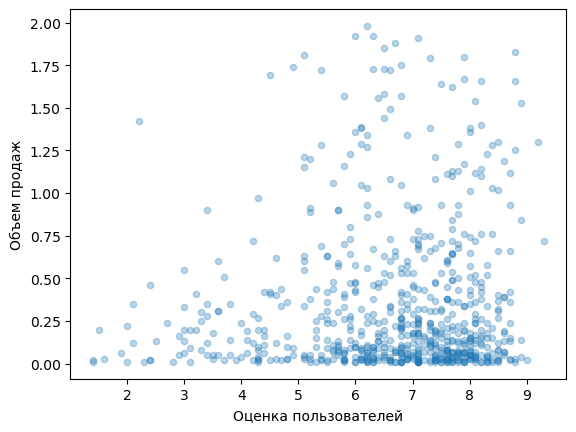

In [43]:
new_games[new_games['total_sales']<2].plot(x='user_score', y='total_sales', kind='scatter', alpha=0.3) 
plt.xlabel('Оценка пользователей')
plt.ylabel('Объем продаж')
plt.show()

На диаграмме рассеивания можно увидеть, что большинство игр получает оценку пользователей в промежутке 5-8,8 балла. Есть отдельные игры, которые разошлись многомиллионными копиями(5-14 млн.копий) и при этом были оцененны пользователями от 4 баллов. Большая часть игр продавалась объемами до 0,25 млн.копий и их оценка составляла 6-8,5 баллов (скопление точек на диаграмме в прямоугольнике 6-8,5 баллов, 0-0,25 млн.продаж).

Все-таки пользователи PS4 немного выше оценивают игры на этой платформе (могу связать это с тем, что на этой платформе выходили большинство ожидаемых игровых новинок).

Коэффициент корреляции Пирсона показывает, что связь между оценкой пользователями и объемами продаж игр очень слабая. Т.е. с ростом оценки нет роста объемов продаж (но в отличии от PS4 связь есть, хоть и очень слабая).


### **3.5 Жанры игр**
Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [44]:
games.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,21.05,97.0,8.2,M
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,16.27,97.0,8.1,M
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,14.63,NaN,NaN,NaN
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,14.60,NaN,NaN,NaN
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,12.62,97.0,8.3,M
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,11.68,NaN,NaN,NaN
60,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,10.24,73.0,2.6,M
69,Call of Duty: Ghosts,PS3,2013,Shooter,4.10,3.63,0.38,1.25,9.36,71.0,2.6,M
72,Minecraft,X360,2013,Misc,5.70,2.65,0.02,0.81,9.18,NaN,NaN,NaN
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,8.58,82.0,4.3,E


In [45]:
games_genre = games.pivot_table(values='total_sales', index='genre', aggfunc = ['sum', 'count', 'median'])
games_genre.columns = ['sales', 'games', 'median']
games_genre = games_genre.sort_values(by='games', ascending = False)
games_genre['percent'] = games_genre['sales'] / sum(games_genre['sales'])*100
games_genre

,sales,games,median,percent
genre,,,,
Action,321.87,766,0.110,29.510677
Role-Playing,145.89,292,0.125,13.375936
Adventure,23.64,245,0.030,2.167435
Sports,150.65,214,0.240,13.812357
Shooter,232.98,187,0.450,21.360790
Misc,62.82,155,0.100,5.759657
Racing,39.89,85,0.120,3.657318
Fighting,35.31,80,0.125,3.237400
Platform,42.63,74,0.225,3.908535


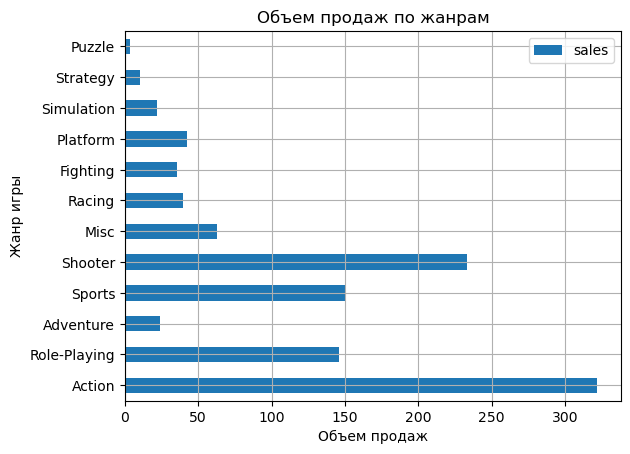

In [47]:
games_genre.plot(kind='barh', y='sales', grid = True, title = 'Объем продаж по жанрам')
plt.xlabel('Объем продаж')
plt.ylabel('Жанр игры')
plt.show()

Больше всего игр на всех платформах в период 2013-2016 гг. было выпущено в жанре **Action** - 766шт.	
Значительно меньше в жанрах **Role-Playing** - 292шт., **Adventure** - 245шт, **Sports** - 214шт., **Shooter**	- 187шт., **Misc** - 155шт.

Меньше всего игр выпускалось в жанре **Puzzle** - 17 шт. 	

Самый продаваемый жанр видеоигр в мире это **Action**. На него приходится более 29,5% продаж. Чуть хуже продаются игры в жанре **Shooter** - 21%.  Значительно меньше покупают игры **Sports** и **Role-Playing**. 

Менее 22млн. проданных копий приходится на игры в жанрах **Simulation**, **Strategy**, **Puzzle**.

- Лидеры по количеству выпущенных видеоигр и объемов продаж во многом совпадают.
- Puzzle в аутсайдерах и по количеству выпущенных игр и по объемам проданных копий.
- Adventure не пользуется популярностью у игроков, хотя игр в таком жанре было выпущено достаточно много.

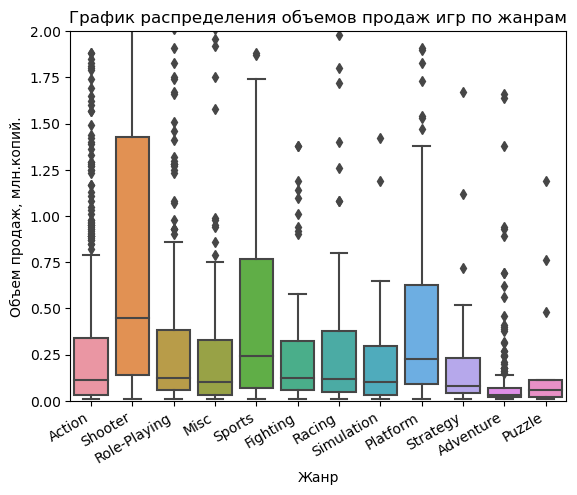

In [48]:
sns.boxplot(x='genre', y="total_sales", data=games)
plt.ylim(0, 2)
plt.xticks(rotation=30, ha = 'right')
plt.ylabel('Объем продаж, млн.копий.')
plt.xlabel('Жанр')
plt.title('График распределения объемов продаж игр по жанрам')
plt.show()

Выше мы рассмотрели объемы продаж копий игр в абсолютных значениях. Но рассмотрим медианные значения объемов продаж. На боксплоте резко выделяется жанр игр **Shooter**. Хоть выпущенно игр в этом жанре было лишь 8% от всех выпущенных на рынок игр, но они продавались большими тиражами. Медианное значение игр этого жанра - 0.450, это значит, что более половины всех игр были проданы объемом более 450 тыс.копий. Похожая ситуация и у игр в жанре **Sports**. Их медианное значение продаж - 240 тыс.копий.

А вот лидеры по количеству игр и объемам продаж в абсолютном значении - **Action** - продавались (по медиане) тиражом в 110 тыс. Скорее всего играет роль высокая конкуренция в данном сегменте.

Но на основании имеющихся данных нельзя судить о доходности игр, т.к. нет данных о рентабельности. Скорее всего игры в жанрах Shooter и Sports более затратны в производстве.

## **4. Портрет пользователя каждого региона**
Определим для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5). Опишем различия в долях продаж.
- Самые популярные жанры (топ-5). Поясним разницу.
- Опишем влияние рейтинга ESRB на продажи в отдельном регионе?

### 4.1 Пользователь из Северной Америки

In [49]:
games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,21.05,97.0,8.2,M
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,16.27,97.0,8.1,M
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,14.63,NaN,NaN,NaN
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,14.60,NaN,NaN,NaN
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,12.62,97.0,8.3,M
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN


In [50]:
games_na_platform = games.pivot_table(index='platform', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending = False)
games_na_platform['persent_sales'] = games_na_platform['na_sales'] / sum(games_na_platform['na_sales']) * 100
games_na_platform

,na_sales,persent_sales
platform,,
PS4,108.74,24.842933
XOne,93.12,21.274360
X360,81.66,18.656188
PS3,63.50,14.507322
3DS,38.20,8.727239
WiiU,29.21,6.673368
PC,11.11,2.538210
Wii,6.56,1.498709
PSV,5.04,1.151447


Большой популярностью у пользователей из Северной Америки пользуются приставки **PS4** и **XOne**. На их долю приходилось почти 46% объемов продаж видеоигр в регионе в анализируемый период. Также в пятерку популярных вошли **X360** и **PS3** и портативная  **3DS**. На долю этой 5ки приходилось 87,9% объемов продаж.

In [51]:
games_na_genre = games.pivot_table(index='genre', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending = False)
games_na_genre['persent_sales'] = games_na_genre['na_sales'] / sum(games_na_genre['na_sales']) * 100
games_na_genre

,na_sales,persent_sales
genre,,
Action,126.05,28.797606
Shooter,109.74,25.071394
Sports,65.27,14.911700
Role-Playing,46.40,10.600626
Misc,27.49,6.280414
Platform,18.14,4.144296
Fighting,15.55,3.552580
Racing,12.96,2.960864
Adventure,7.14,1.631217


Большой популярностью у пользователей из Северной Америки пользуются игры в жанах: **Action** - 28% от всех выпуженных игр в различных жанрах и  **Shooter** - 25% рынка. Значительно ниже популярность у таких игр, как  **Sports**, **Role-Playing** и **Misc**.	

In [52]:
games_na_rating = games.pivot_table(index='rating', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending = False)
games_na_rating['persent_sales'] = games_na_rating['na_sales'] / sum(games_na_rating['na_sales']) * 100
games_na_rating

,na_sales,persent_sales
rating,,
M,165.21,47.434609
E,79.05,22.696603
E10+,54.24,15.573229
T,49.79,14.295558


Большинство игр в Северной Америке продаются с рейтингом **М**, т.е. это игры для взрослых. Т.е. можно предположить, что 47% игроков в возрасте более 18лет. Почти 22% продаж - это игры для всех возрастов (**Е**). На игры для детей старше 10 лет (**Е10+**) и подростков (**Т**) приходится 15%-14% объемов продаж соответственно. 

### 4.2 Пользователь из Европы

In [53]:
games_eu_platform = games.pivot_table(index='platform', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending = False)
games_eu_platform['persent_sales'] = games_eu_platform['eu_sales'] / sum(games_eu_platform['eu_sales']) * 100
games_eu_platform

,eu_sales,persent_sales
platform,,
PS4,141.09,35.971241
PS3,67.81,17.288326
XOne,51.59,13.152997
X360,42.52,10.840578
3DS,30.96,7.893328
PC,25.36,6.465594
WiiU,19.85,5.060806
PSV,6.10,1.555210
Wii,5.93,1.511868


Большой популярностью у пользователей из Европы пользуются приставки **PS4** и **PS3**. На их долю приходилось 53% объемов продаж видеоигр в регионе в анализируемый период. Также в пятерку популярных вошли **XOne**, **X360**, **3DS**. На долю этой 5ки приходилось 85% объемов продаж.

In [54]:
games_eu_genre = games.pivot_table(index='genre', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending = False)
games_eu_genre['persent_sales'] = games_eu_genre['eu_sales'] / sum(games_eu_genre['eu_sales']) * 100
games_eu_genre

,eu_sales,persent_sales
genre,,
Action,118.13,30.117533
Shooter,87.86,22.400122
Sports,60.52,15.429722
Role-Playing,36.97,9.425592
Racing,20.19,5.147490
Misc,20.04,5.109247
Platform,15.58,3.972159
Simulation,10.92,2.784081
Fighting,8.55,2.179843


Большой популярностью у пользователей из европейских стран пользуются игры в жанах: **Action** - 30% всех выпуженных игр в различных жанрах. Также у европейцев популярен жанр **Shooter** (22% рынка). Значительно ниже популярность у таких игр, как **Sports**, **Role-Playing** и **Racing**.

In [55]:
games_eu_rating = games.pivot_table(index='rating', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending = False)
games_eu_rating['persent_sales'] = games_eu_rating['eu_sales'] / sum(games_eu_rating['eu_sales']) * 100
games_eu_rating

,eu_sales,persent_sales
rating,,
M,145.32,46.380697
E,83.36,26.605387
E10+,42.69,13.625048
T,41.95,13.388868


Большинство игр в Европе продаются с рейтингом **М**, т.е. это игры для взрослых. Т.е. можно предположить, что 46% игроков - это игроки в возрасте старше 18лет. Более 26% продаж - это игры для всех возрастов (**Е**). На игры для детей старше 10 лет (**Е10+**) и подростков (**Т**) приходится по 13% объемов продаж.

### 4.3 Пользователь из Японии

In [56]:
games_jp_platform = games.pivot_table(index='platform', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending = False)
games_jp_platform['persent_sales'] = games_jp_platform['jp_sales'] / sum(games_jp_platform['jp_sales']) * 100
games_jp_platform

,jp_sales,persent_sales
platform,,
3DS,67.81,48.167353
PS3,23.35,16.586163
PSV,18.59,13.205001
PS4,15.96,11.336838
WiiU,10.88,7.728371
PSP,3.29,2.336980
X360,0.51,0.362267
XOne,0.34,0.241512
Wii,0.05,0.035516


Большой популярностью у пользователей из Японии пользуются платформы **3DS**, **PS3**, **PSV**, **PS4**, **WiiU**. На долю этой 5ки приходилось почти 97% объемов продаж. **XOne** и **X360** совсем не популярны в Японии.

Особенность пользователей из Японии - для видеоигр они выбирают портативные игровые системы - почти 69% всего объема продаж.


In [57]:
games_jp_genre = games.pivot_table(index='genre', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending = False)
games_jp_genre['persent_sales'] = games_jp_genre['jp_sales'] / sum(games_jp_genre['jp_sales']) * 100
games_jp_genre

,jp_sales,persent_sales
genre,,
Role-Playing,51.04,36.255150
Action,40.49,28.761188
Misc,9.20,6.535019
Fighting,7.65,5.434011
Shooter,6.61,4.695269
Adventure,5.82,4.134110
Sports,5.41,3.842875
Platform,4.79,3.402472
Simulation,4.52,3.210683


Большой популярностью у пользователей из Японии пользуются игры в жанах: **Role-Playing** - 36% всех выпуженных игр в различных жанрах и **Action** - 28%. Значительно ниже популярность у таких игр, как **Misc**, **Fighting**, **Shooter**.

In [58]:
games_jp_rating = games.pivot_table(index='rating', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending = False)
games_jp_rating['persent_sales'] = games_jp_rating['jp_sales'] / sum(games_jp_rating['jp_sales']) * 100
games_jp_rating

,jp_sales,persent_sales
rating,,
T,20.59,36.945990
E,15.14,27.166697
M,14.11,25.318500
E10+,5.89,10.568814


Большинство игр в Японии продаются с рейтингом **Т**, т.е. это игры для подростков (37%). 27% - это игры для всех возрастов (**Е**), и лишь 25% - видеоигры для взрослых людей.

In [59]:
games_rating = games.pivot_table(index='rating', values=['na_sales','eu_sales', 'jp_sales'], aggfunc='sum').sort_values(by='na_sales', ascending = False)
games_rating['na_persent'] = games_rating['na_sales'] / sum(games_rating['na_sales']) * 100
games_rating['eu_persent'] = games_rating['eu_sales'] / sum(games_rating['eu_sales']) * 100
games_rating['jp_persent'] = games_rating['jp_sales'] / sum(games_rating['jp_sales']) * 100
games_rating

,eu_sales,jp_sales,na_sales,na_persent,eu_persent,jp_persent
rating,,,,,,
M,145.32,14.11,165.21,47.434609,46.380697,25.318500
E,83.36,15.14,79.05,22.696603,26.605387,27.166697
E10+,42.69,5.89,54.24,15.573229,13.625048,10.568814
T,41.95,20.59,49.79,14.295558,13.388868,36.945990


Итог:

Игроки из Северной Америки и Европы во многом схожи: 
- они выбирают консоли для видеоигр (PS4 и XOne);
- самые популярные жанры видеоигр: Action и Shooter;
- основной объем продаж - игры для взрослой аудитории или для всей семьи.

Особняком стоят пользователи из Японии:
- для игры в видеоигры они выбирают портативные игровые системы;
- основной жанр видеоигр - это ролевые игры и только потом Action;
- основной объем продаж - игры для подростков и всех возрастных категорий.
Во многом эти особенности японских пользователей могут быть связаны с особенностями японской культуры и их традициами.


## **5. Проверка гипотез**
Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

### **5.1 Средние пользовательские рейтинги платформ Xbox One и PC одинаковые**

Нулевая гипотеза Н0: Средние пользовательские рейтинги платформ Xbox One и PC равны.

Альтернативная гипотеза Н1: Средние пользовательские рейтинги платформ Xbox One и PC отличаются.

Выборки независимы, поэтому использую метод ttest_ind.
Диссперсии нельзя считать равными поэтому укажем аргумент "equal_var = False"

In [60]:
from scipy import stats as st

games_xbox_one = games[games['platform'] == 'XOne']['user_score'].dropna()

games_pc = games[games['platform'] == 'PC']['user_score'].dropna()

alpha = .05

results = st.ttest_ind(games_xbox_one, games_pc, equal_var = False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


По результатам проведения t-теста не получилось отвергнуть нулевую гипотезу, т.к. значение p-value оказалось больше критического уровеня статистической значимости (alpha). Значит средние пользовательские рейтинги платформ Xbox One и PC не отличаются.

### 5.2 Средние пользовательские рейтинги жанров Action и Sports (англ. «спортивные соревнования») разные

Нулевая гипотеза Н0: Средние пользовательские рейтинги жанров Action и Sports одинаковые.

Альтернативная гипотеза Н1: Средние пользовательские рейтинги жанров Action и Sports разные.

Выборки независимы, поэтому использую метод ttest_ind.
Диссперсии нельзя считать равными поэтому укажем аргумент "equal_var = False"

In [61]:
games_action = games[games['genre'] == 'Action']['user_score'].dropna()

games_sports = games[games['genre'] == 'Sports']['user_score'].dropna()

alpha = .05

results = st.ttest_ind(games_action, games_sports, equal_var = False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.4460039700704315e-20
Отвергаем нулевую гипотезу


По результатам проведения t-теста отвергаем нулевую гипотезу, т.к. значение p-value оказалось меньше критического уровеня статистической значимости (alpha). Значит средние пользовательские рейтинги жанров Action и Sports различны.

# 6. Вывод

В ходе исследования продаж компьютерных игр были изучены представленные данные, проведен исследовательский анализ продаж в разрезе платформ, жанров и регионов, а также проверены две гипотезы.

Для исследования были представленные данные о продажах видеоигр за период 1985-2016гг. Большой скачок в развитии индустрии видеоигр начался в 2002году и достиг пика в 2008-2009гг. За весь период времени игровые платформы появлялись и исчезали, заменялись более новыми и современными аналогами. Было выяснено, что среднее время существования платформы 7-8 лет. Для анализа был взят период времени 2013-2016гг. За этот временной промежуток можно увидеть динамику развития платформ и предсказать их актуальность на будующий год.

В ходе проведенного анализа мы выяснили, что самыми перспективными платформами являются PS4, XOne, в меньшей степени - 3DS, WiiU, PC.

Между анализируемыми регионами (Северная Америка, Европа и Япония) были выявлены различия в предпочтениях при выборе платформы, жанра и типа видеоигры. Предпочтения игроков из Северной америки и Европы во многом схожи, а у японцев они значительно отличаются. В связи с этим, разработку продукта и рекламную компанию необходимо строить с учетом выявленных закономерностей. 

В Северной Америке и Европе: 
будут популярны игры на платформах PS4 или XOne в жанрах Action и Shooter с рейтингом ESRB M или E.

В Японии
будут популярны игры в жанрах Role-Playing или Action на платформах 3DS с рейтингом ESRB E или T.
